# Reg_Batch_L2.ipynb

In this notebook, I continue a pseudo-code started in class. The purpose of the pseudo-code was to show batch regularization through an example with linear regression. I explain the setup in depth, particularly focusing on how we could make the monomial basis any basis (such as a neural network). I also include a section on $L^2$ regularization, which was mentioned in class. This includes introducing and finding an extra hyperparameter.

## Problem Overview and Motivation

We will start with slight modifications to an example problem given in class. Given data, our goal is to create a model that predicts the data. For the model shape, we will chose a model that is linear with respect to some constructed/engineered features. In other words, we will have a linear model, but we may expand the input variable in non-linear ways. We will gradually discuss more details, and the early code is _inspired_ by the code from class. However, it has been completely reformatted in my own original way. Unless otherwise stated, the vast majority of the code in this notebook is my own.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Generate and show the data. This will remain fixed throughout.

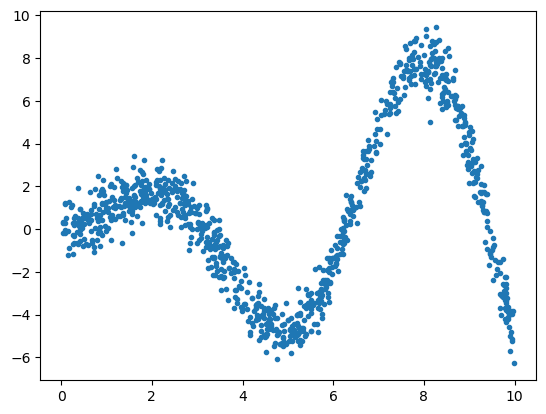

In [743]:
N = 1000
x_train = 0 + 10.0 * np.random.rand(N)
# x_train = 0 + np.pi/1.0 * np.random.rand(N)

def generate_data(x_train):
    y_train = x_train*np.sin(x_train) + 0.7*np.random.randn(len(x_train))
    # y_train = x_train.
    return y_train
    
y_train = generate_data(x_train)
plt.plot(x_train,y_train,'.')

In [744]:
p = 15
# Using this compact representation from Prof. Raissi's code.
X_train = np.array([x_train**i for i in range(0,p)]).transpose()

In [745]:
X_train.shape

(1000, 15)

Refer to [Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares#Normal_equations) for further details and explanation.

For a given basis with $p$ functions $\{ \phi _{j}(x) \}_{j=1}^p$, we seek to find the coefficients of these functions such that we explain the data. We'll start by assuming a simple monomial basis with $\phi_{j}(x) = x^{j-1} , \quad \forall j \in \{1,2,...,p\}$.

With $y \in \mathbb{R}^N$, $X \in \mathbb{R}^{N \times p}$, find $\beta \in \mathbb{R}^p$ such that
$$ \mathbf{X} \beta = y $$

$$
\mathbf{X} =
\begin{bmatrix}
\phi_1 (x_1) & \phi_2 (x_1) & \phi_3 (x_1) &...    & \phi_p (x_1) \\
\phi_1 (x_2) & \phi_2 (x_2) & \phi_3 (x_2) &...    & \phi_p (x_2) \\
\vdots       & \vdots       & \vdots       &\ddots & \vdots       \\
\phi_1 (x_N) & \phi_2 (x_N) & \phi_3 (x_N) &...    & \phi_p (x_N) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2 &...    & x_1^{p-1} \\
1 & x_2 & x_2^2 &...    & x_2^{p-1} \\
\vdots & \vdots & \vdots       & \ddots & \vdots       \\
1 & x_N & x_N^2 &...    & x_N^{p-1} \\
\end{bmatrix}
$$

The system is likely overdetermined - there are too many equations (rows) to satisfy, and not enough unknowns ($\beta$) (columns) for this to be done. Instead, we can try to choose $\beta$ so that we are as "close" as possible to satisfying the equations. To define what being "close" means, we need to have a notion of distance between objects. For least squares regression, we choose this distance as measured by the $L^2$ norm, or the Euclidean norm. Formally, let us choose $\beta$ such that
$$
    \arg \min_\beta || y - \mathbf{X} \beta ||_2 = \arg \min_\beta || y - \mathbf{X} \beta ||^2_2
$$

Where for the equality, we have used the fact that the minimum of $|z|$ occurs at the same location as the minimum of $|z|^2$. The objective above is convex in $\beta$, so a minimum is realized when the gradient of the objective with respect to $\beta$ is zero. Doing this yields the normal equations:
$$
(\mathbf{X}^T \mathbf{X}) \beta = \mathbf{X} ^T y
$$

If $\mathbf{X}$ has linearly independent columns, $\mathbf{X}^T \mathbf{X}$ is invertible and the choice of $\beta$ is unique. However, as a numerical analyst will warn, inverting this matrix directly is a bad idea. If we weren't trying to illustrate a point, we would just solve the system for $\beta$ using `np.linalg.solve`. This would then solve the system in a more stable way, potentially making use of a QR factorization.

For absolute clarity, the predictive function, $\hat{y} : \mathbb{R} \to \mathbb{R}$, we create will take the form:
$$

\hat{y} (x) = \beta_1 \phi_1 (x) + \beta_2 \phi_2 (x) + ... + \beta_p \phi_p (x) 

$$
where we have overloaded the definition of $\beta$. In the above, $\beta_i$ refers to the $ i $ th entry of the vector $\beta$.


[ 1.37701094e+01 -1.05118960e+01  6.75603443e+00 -3.19987684e+00
  7.36441940e-01  1.00911953e-01 -1.32911377e-01  3.85041833e-02
 -4.21335083e-03 -1.60122989e-04  9.14453121e-05 -9.82920756e-06
  4.63456331e-07 -7.55296270e-09 -4.97647479e-11]


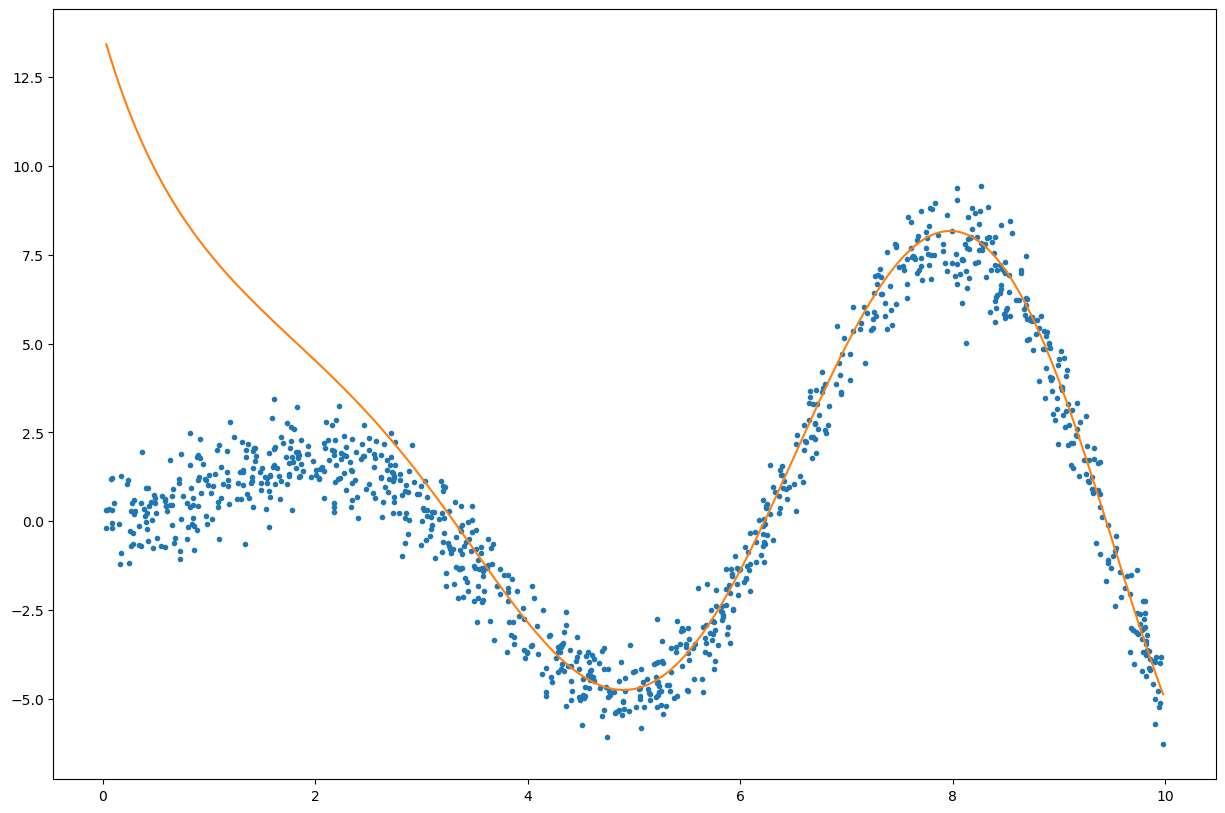

In [746]:
beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)
# beta = np.linalg.solve(X_train.T @ X_train,X_train.T @ y_train)
print(beta)

def y_fun(beta,x_train):
    X_train = np.array([x_train**i for i in range(0,p)]).transpose()
    y_pred = X_train @ beta
    return y_pred

x_grid = np.linspace(np.min(x_train),np.max(x_train),500)
y_pred = y_fun(beta,x_grid)

plt.figure(figsize=(15,10))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-')

We can choose other bases too.

$$
\phi_j (x)
\begin{cases}
    & \cos(\frac{j \cdot x}{10}), \quad j \text{ even}\\
    & \sin(\frac{j \cdot x}{10}), \quad j \text{ odd}
\end{cases} \quad \forall j \in \{ 1,2,...,p \}
$$

We divide by $10$ so the frequencies are more relevant to this problem. Otherwise we end up without enough low frequencies to get a decent reconstruction.

Condition number of X^T X : 2.396766E+30 
Condition number of X^T X : 2.689633E+16 


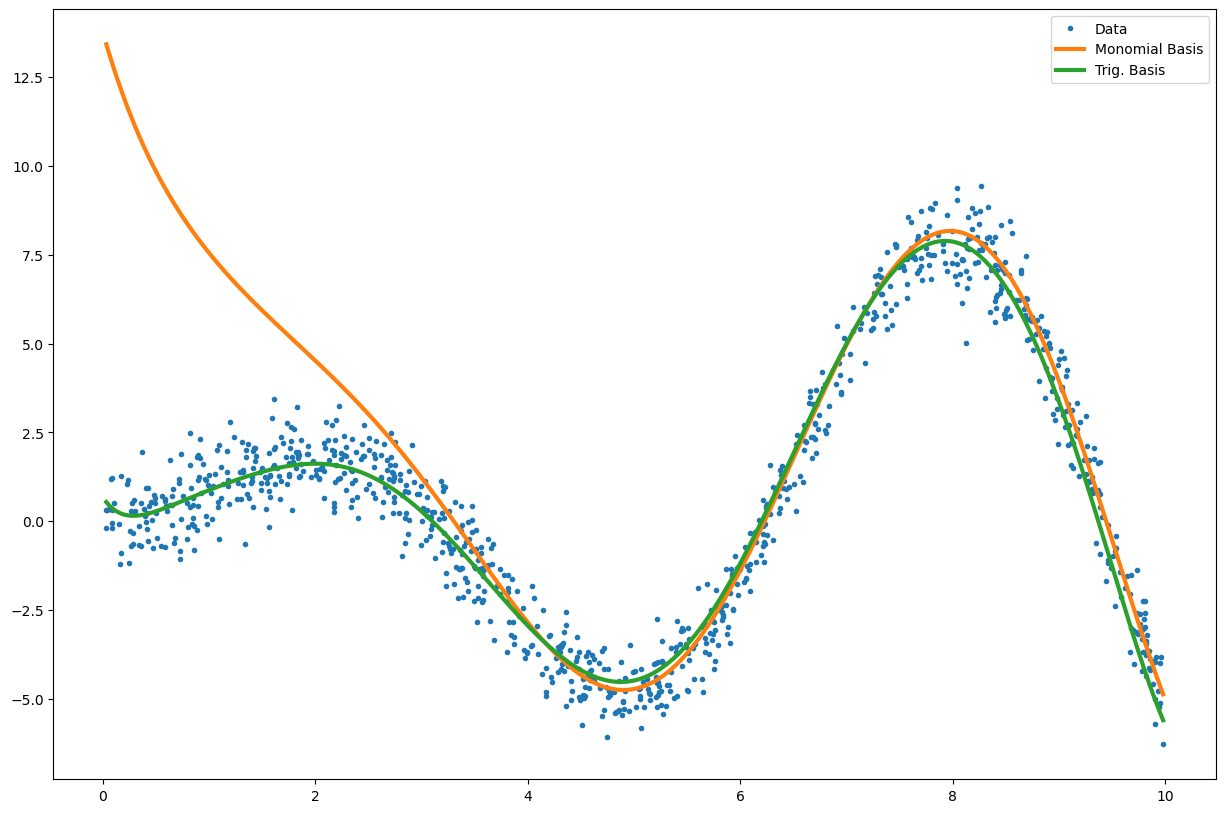

In [747]:
# p = 20

phi = lambda x_train : np.array([x_train**i for i in range(0,p)]).transpose()
phi_sin = lambda x_train : np.array([np.sin(x_train*i/10)*(i%2==1) + \
    np.cos(x_train*i/10)*(i%2==0) for i in range(0,p)]).transpose()

def y_fun(beta,x_train,phi):
    X_train_sin = phi(x_train)
    y_pred = X_train_sin @ beta
    return y_pred

def predict_y(x_train,y_train,phi,ret_beta=False):
    X_train = phi(x_train)
    XTX = X_train.T @ X_train
    print(f"Condition number of X^T X : {np.linalg.cond(XTX):2E} ")
    beta = np.linalg.inv(XTX) @ (X_train.T @ y_train)
    # beta = np.linalg.solve(X_train.T @ X_train,X_train.T @ y_train)
    y_pred = y_fun(beta,x_grid,phi)

    # A nice feature for later
    if ret_beta:
        return (y_pred,beta)
    else:
        return y_pred


y_pred = predict_y(x_train,y_train,phi)
y_pred_sin = predict_y(x_train,y_train,phi_sin)


plt.figure(figsize=(15,10))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-',linewidth=3)
plt.plot(x_grid,y_pred_sin,'-',linewidth=3)
plt.legend(('Data','Monomial Basis','Trig. Basis'))

In the above, we see that the data matrix transpose times the data matrix ($\mathbf{X}^T \mathbf{X}$) is very poorly conditioned, on the order of $10^{29}$ for the monomial basis and $10^{19}$ for the trigonometric basis. This results in a very poor prediction with respect to the data, as seen in the figure above. We will explore the methods discussed in class to combat this issue.

We will do batch normalization to combat this issue. We will use the data matrix $\mathbf{X}$ to compute $\bar{\mathbf{X}}$, and $s_\mathbf{X}$, which are the column-wise empirical mean and standard deviation of $\mathbf{X}$ respectively.

That is, $\bar{\mathbf{X}}, s_{\mathbf{X}} \in \mathbb{R}^{1 \times p}$


$$
\bar{\mathbf{X}} =
\begin{bmatrix}
\frac{1}{N} \sum_{i=1}^N \phi_1 (x_i) & \frac{1}{N} \sum_{i=1}^N \phi_2 (x_i) & \frac{1}{N} \sum_{i=1}^N \phi_3 (x_i) &...    & \frac{1}{N} \sum_{i=1}^N \phi_p (x_i) \\
\end{bmatrix}
$$

and with $\bar{\mathbf{X}}_j$ denoting the $j$ th element of the above row vector,

$$
s_{\mathbf{X}}^2 =
\begin{bmatrix}
\frac{1}{N} \sum_{i=1}^N \left( \phi_1 (x_i) - \bar{\mathbf{X}}_1 \right )^2  & 
\frac{1}{N} \sum_{i=1}^N \left( \phi_2 (x_i) - \bar{\mathbf{X}}_2 \right )^2  & 
\frac{1}{N} \sum_{i=1}^N \left( \phi_3 (x_i) - \bar{\mathbf{X}}_3 \right )^2  &...    & 
\frac{1}{N} \sum_{i=1}^N \left( \phi_p (x_i) - \bar{\mathbf{X}}_p \right )^2  \\
\end{bmatrix}
$$

We can create a column vector of ones, $\mathbf{1}_N \in \mathbb{R}^{N \times 1}$, and denoting the operator $\oslash$ as elementwise division for tensors of the same shapes, we can write a standardized data matrix as the following:

$$
\tilde{\mathbf{X}} = (\mathbf{X} - \mathbf{1}_N \bar{\mathbf{X}}) \oslash (\mathbf{1}_N s_{\mathbf{X}})
$$

It is straightforward to verify that the above equation correctly matches matrix sizes. The use of $\mathbf{1}_N$ is "broadcasting" but clarifies the implementation. Also, clearly, the above equation follows the defintion of a standardized one dimensional variable from statistics.

When first writing this, I ran into a problem where the resulting matrix was singular (the condition number increased to infinity), which is the opposite of what we were trying to do. It turns out that the problem was also normalizing the constant column, which has an undefined standard deviation. Thus, we need to just omit the constant column from the definition of $\mathbf{X}$ in the above, and add this column back in at the end.

Along the same lines of thinking, sometimes we want to add a stabilizing term to the denomenator, in case the standard deviation of a column is very small. Then, we choose a small $\varepsilon$ and use

$$
\tilde{\mathbf{X}} = (\mathbf{X} - \mathbf{1}_N \bar{\mathbf{X}}) \oslash (\mathbf{1}_N s_{\mathbf{X}} + \mathbf{1}_N \mathbf{1}_{p-1}^T  \varepsilon)
$$


We can also think of this process as simply finding a new, data-informed basis $\{ \tilde{\phi} \}_{j=1}^p $ by normalizing the old basis with the data. This way of thinking is what is easiest to implement in code, to make the best use of the modular functions already defined (we will show both ways for clarity though). We won't do this normalization with the trigonometric basis, but it would be easy to do.

(14,)
(14,)
[4.97775365e+00 3.32407525e+01 2.51246159e+02 2.02972440e+03
 1.70807656e+04 1.47720382e+05 1.30264867e+06 1.16557516e+07
 1.05481437e+08 9.63311058e+08 8.86376336e+09 8.20761311e+10
 7.64135400e+11 7.14777378e+12]
[2.90907564e+00 3.04101427e+01 2.90853485e+02 2.74517221e+03
 2.59144459e+04 2.45468572e+05 2.33471202e+06 2.22955880e+07
 2.13701535e+08 2.05506203e+09 1.98197544e+10 1.91632590e+11
 1.85694147e+12 1.80286538e+13]
(1000, 15)
[ 1.00000000e+00  2.10609308e-16 -2.09832152e-16  6.38378239e-18
 -5.78426196e-17 -6.98052727e-18 -9.27209698e-17  1.15546461e-16
  2.90323321e-17 -2.13717932e-18  2.91988655e-17 -4.46309656e-17
  8.60422844e-17  4.04121181e-17 -4.80726570e-17]
Condition number of X^T X : 1.144505E+17 
Condition number of X^T X : 1.144505E+17 
Relative difference between two methods: 7.995792979687786e-07


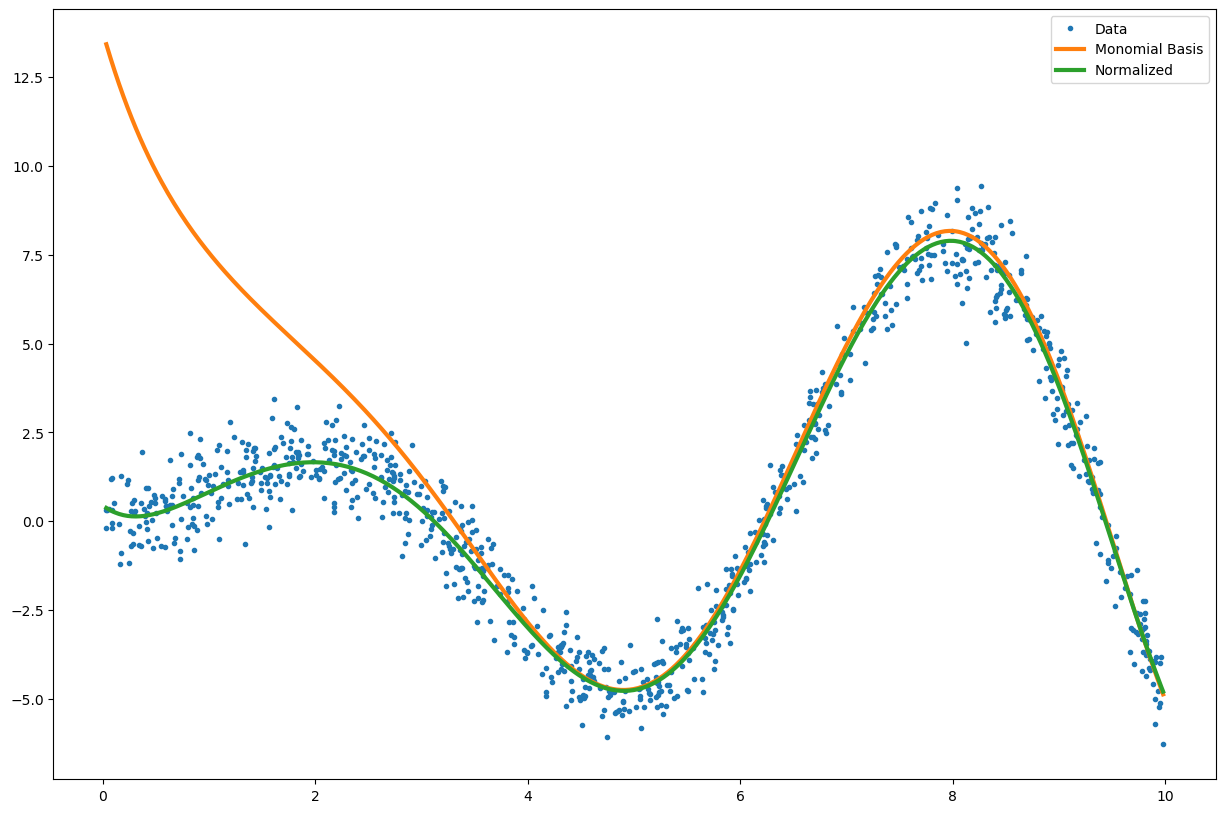

In [748]:
mean_X = np.mean(X_train[:,1:], axis=0)
s_X = np.std(X_train[:,1:], axis=0)
eps = 10e-5
print(mean_X.shape)
print(s_X.shape)
print(mean_X)
print(s_X)

# Using the linear algebra manipulation method:
ones = np.expand_dims(np.ones_like(x_train), axis=1)

X_tilde = (X_train[:,1:] - ones@np.expand_dims(mean_X, axis=0)) / (ones@np.expand_dims(s_X, axis=0))
X_tilde = np.hstack((X_train[:,:1],X_tilde))
print(X_tilde.shape)
print(np.mean(X_tilde,axis=0))
XTX = X_tilde.T @ X_tilde
print(f"Condition number of X^T X : {np.linalg.cond(XTX):2E} ")
beta_tilde = np.linalg.inv(XTX) @ (X_tilde.T @ y_train)


# Using the function definition method:
phi_norm = lambda x_train : \
        np.array([(i==0)*x_train**i + \
        (i>0)*(x_train**i - mean_X[i-1]) / s_X[i-1] \
        for i in range(0,p)]).transpose()

(y_pred_norm,beta_tilde_fun) = predict_y(x_train,y_train,phi_norm,ret_beta=True)

# Compare the two methods as a sanity check:
print(f'Relative difference between two methods: ' +\
      f'{np.linalg.norm(beta_tilde-beta_tilde_fun)/np.linalg.norm(beta_tilde)}')

# Plot results
plt.figure(figsize=(15,10))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-',linewidth=3)
plt.plot(x_grid,y_pred_norm,'-',linewidth=3)
plt.legend(('Data','Monomial Basis','Normalized'))

### Results of Normalization:
In the above, we see that normalization gives a much smaller condition number ($10^{16}$ rather than $10^{29}$), without adding much complexity (especially for the single batch case). Because the condition number is smaller, we end up with a visibly better prediction, although it is still not perfect. We also saw that it can be applied to any set of basis functions or input features, without loss of generality.

In class, we also talked about standardizing by subtracting the minimum (rather than the average), and dividing by the range (rather than the standard deviation). Rather than mapping the variables to a standard normal distribution (at least the first two moments), this would map to a unit uniform distribution (in range).


As one last note, if we were smart, it would not have been too tough to write the normalization in a general form, so that it could be applied to any set of basis functions, without needing to manually redefine them, as we did above. Then, we would think of $\tilde{\bullet}$ as an operation on functions, and this could be applied to any of the basis functions to yield normalized basis functions. On the other hand, in practice we just need to store the mean and the standard deviation and apply these to numbers, rather than to functions.

## Adding an $L^2$ penalty / weight decay

In class, we also talked about penalizing the loss function when the parameters of the model get too big. In this case, our loss function would then take the following form:
$$
L_\lambda(\beta) = || y - \mathbf{X} \beta ||^2_2 + \frac{\lambda}{2} || \beta ||_2^2
$$
where $\lambda > 0$ is a penalty parameter enforcing how strongly we believe that the parameters should be small. As mentioned in class, if we take $\lambda \to 0$, we get no regularization and end up with overfitting or ill-conditioning. On the other hand, if we let $\lambda \to \infty$, then $\beta \to 0$, and the model does not learn from the data. It could be that $\lambda = 0$ is best, but we will explore a method to decide on this value.

Just as was the case for the unmodified loss function, we can exactly find the solution to the Tikhonov loss function. Refer to [Wikipedia](https://en.wikipedia.org/wiki/Tikhonov_regularization) or [this book by Aster](https://www.sciencedirect.com/book/9780123850485/parameter-estimation-and-inverse-problems) for a more thorough explanation and derivation. I spent a bit of time digging through this second resource. Note that the notation of $\frac{\lambda^2}{2}$ vs $\lambda^2$ vs. $\lambda$ is not standardized, but this difference does not matter, as this is an unknown, arbitrary hyperparamter anyways. The solution to the minimization is given by the following:

$$
(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I}) \beta = \mathbf{X} ^T y
$$

Clearly we see that $\lambda$ improves the conditioning of $\mathbf{X}^T \mathbf{X}$, as it would shift both the minimum and maximum eigenvalues in the same direction, thus decreasing their ratio (and condition number is the ratio of min and max eigenvalues). We will implement this method on our original, unnormalized monomial model. We will use the unnormalized model, as it has the most room for improvement, to demonstrate this method.

In [749]:
def predict_y_lam(x_train,y_train,phi,lam,ret_beta=False,ret_res=False,supress_output=True):
    X_train = phi(x_train)
    XTX = X_train.T @ X_train + lam
    if not supress_output:
        print(f"Condition number of X^T X : {np.linalg.cond(XTX):2E} ")
    beta = np.linalg.inv(XTX) @ (X_train.T @ y_train)
    # beta = np.linalg.solve(X_train.T @ X_train,X_train.T @ y_train)
    y_pred = y_fun(beta,x_grid,phi)

    # Let's add in computing the residual too.
    if ret_res:
        res = np.linalg.norm(y_fun(beta,x_train,phi) - y_train)
        out = [y_pred,res]
    else:
        out = [y_pred]

    if ret_beta:
        out.append(beta)

    return out

    

# Let's verify the code with the two checks we mentioned above...
lam = 0
# This is the same as what we started with...
temp = predict_y_lam(x_train,y_train,phi,lam,ret_beta=True)
beta_lam = temp[1]
print(np.linalg.norm(beta-beta_lam)/np.linalg.norm(beta))

lam = 10e31
# This is the same as what we started with...
temp = predict_y_lam(x_train,y_train,phi,lam,ret_beta=True)
beta_lam = temp[1]
# This should approach 0
print(np.linalg.norm(beta_lam))

0.0
0.04665161236752442


Let's do this for a range of $\lambda$ and look at the L-curve. The L-curve shows the trade-off between the data fit, and the model simplicity. The data fit is given by the norm of the residual ($||\mathbf{X} \beta - y||_2$), and the model simplicity is represented by a small norm of the parameters ($|| \beta ||_2 $). We want both of these things, so it's a trade-off between them. Refer to some multi-objective optimization or inverse problem resource (such as chpater 4 of [this book by Aster](https://www.sciencedirect.com/book/9780123850485/parameter-estimation-and-inverse-problems)). This idea is rooted in the [Pareto Principle](https://en.wikipedia.org/wiki/Pareto_principle).

Condition number of X^T X : 9.978420E+26 


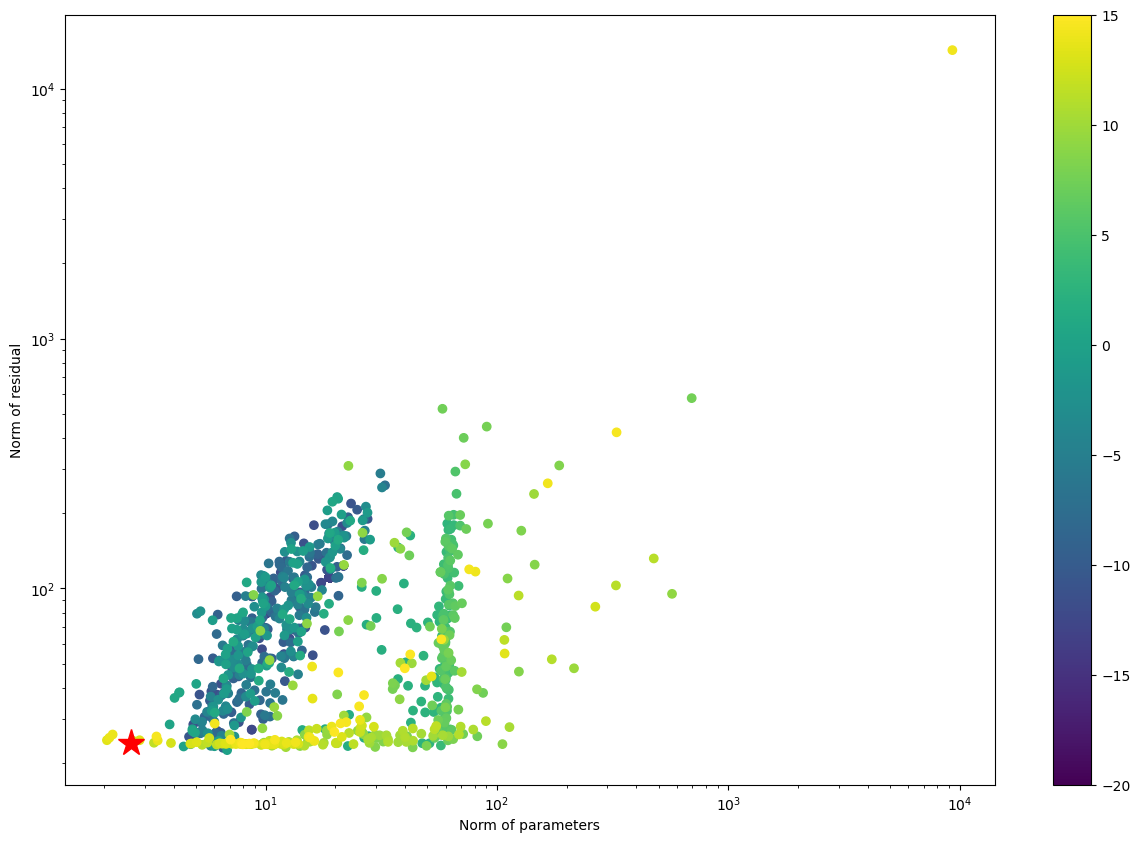

In [757]:
# y_train = y_train
lams = np.logspace(-20,15,1000)
ress = np.zeros_like(lams)
norms = np.zeros_like(lams)

for i,lam in enumerate(lams):
    temp = predict_y_lam(x_train,y_train,phi,lam,ret_res=True,ret_beta=True)
    res_norm = temp[1]
    beta_norm = np.linalg.norm(temp[2])
    ress[i] = res_norm
    norms[i] = beta_norm

plt.figure(figsize=(15,10))
plt.scatter(norms,ress,c=np.log10(lams))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Norm of parameters')
plt.ylabel('Norm of residual')
plt.colorbar()

# This was chosen after looking at the plot...
lam_opt = 10**(14.5)
temp = predict_y_lam(x_train,y_train,phi,lam_opt,ret_res=True,ret_beta=True,supress_output=False)
res_norm_opt = temp[1]
beta_norm_opt = np.linalg.norm(temp[2])
plt.plot(beta_norm_opt,res_norm_opt,'r*',markersize=20)

In the above, I experimented with the bounds quite a bit, trying to get a figure that made sense. I also switched to consider the normalized method, hoping it would give more sensible results. In the above, we do not see an L-curve, rather, we see that we can simultaneously decrease the norm of the parameters while also decreasing the norm of the residual. Thus, there is no trade-off. This makes sense, because we were at the point where the poor conditioning was greatly impacting the residual. Looking at this plot, we went back and chose $\lambda = 10^{14.5}$.

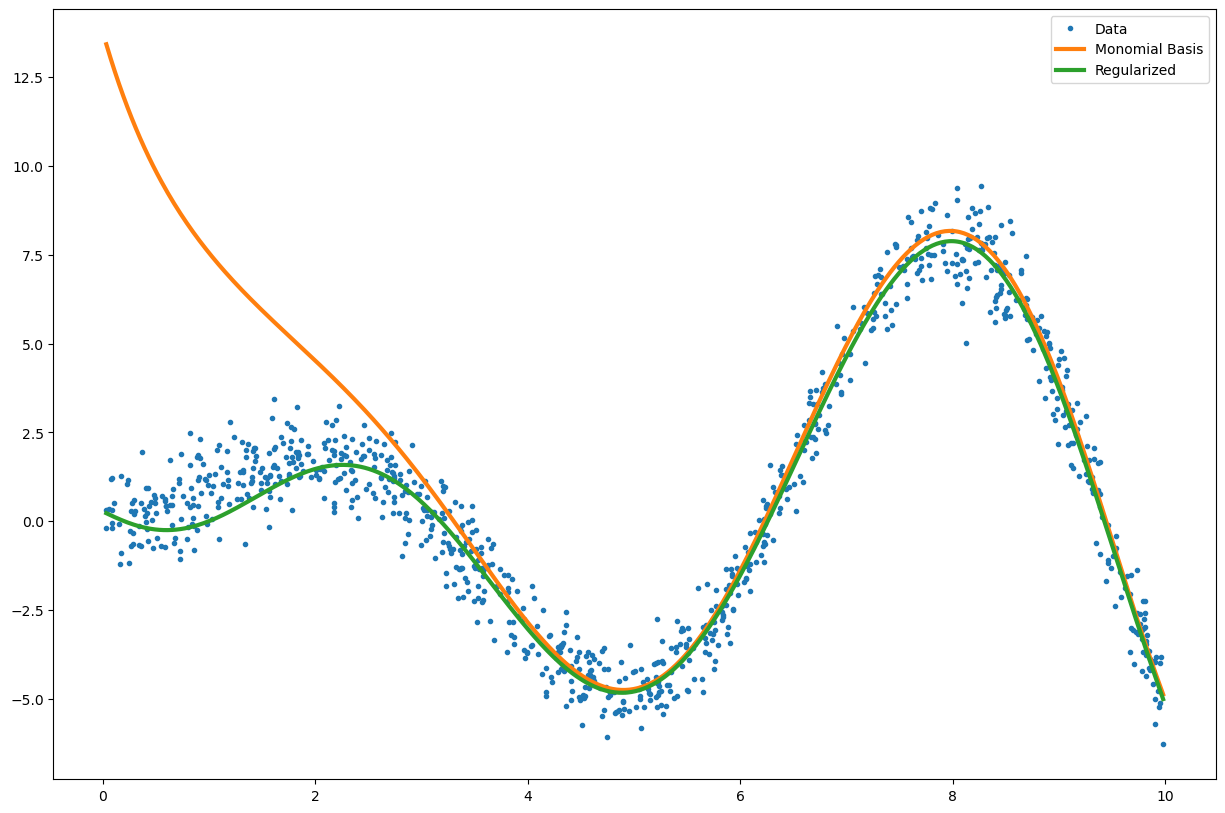

In [758]:
y_pred_lam = temp[0]
# Plot results
plt.figure(figsize=(15,10))
plt.plot(x_train,y_train,'.')
plt.plot(x_grid,y_pred,'-',linewidth=3)
plt.plot(x_grid,y_pred_lam,'-',linewidth=3)
plt.legend(('Data','Monomial Basis','Regularized'))

In the above, we see that by using $L^2$ regularization, we could reduce the conditioning of $\mathbf{X}^T \mathbf{X}$ by 3 orders of magnitude, while also greatly improving the fit to the data. This was a weird circumstance, where there was not a trade-off between regularization and data fit. Usually, you need to sacrifice one to improve on the other other.

## Conclusion

In this notebook, we explored two huge concepts used to regularize neural networks. The first method, batch normalization uses data to change the basis functions to be centered at 0, with a standard deviation of 1. For this case, we saw that the condition number of $\mathbf{X}^T \mathbf{X}$ decreased by about 13 orders of magnitude, and the prediction visually improved. In the second method, we added a penalty for when parameters are large. By doing this, we introduced an extra hyperparameter $\lambda$, which had to be tuned. After tuning (which uses only training data), the condition number of $\mathbf{X}^T \mathbf{X}$ decreased by 3 orders of magnitude, and again, the model visually improved. We demonstrated these methods for an expansion in the monomials. However, we also introduced the basis functions as arbitrary functions, giving an example of using trigonometric functions instead. Clearly, this concept can be generalized to neural networks, where for each layer, the basis functions are given by a the units, and the weights going to one output are the parameters $\beta$. In particular, this work sets a solid foundation to explore Extreme Learning Machines, which are neural networks where only the weights / coefficients of the last layer are trained. This is an area of interest to pursue in the future.